# Examen 3
## Física Computacional
## Integrantes:
### Carlos Sierra Evelin Ameyalli
$Amee \heartsuit Carlos$
### Hernández Ramos Sandra 
$Sandii\hbar ers^{\heartsuit}$ 🦆🌵🌹🥀🌿🍀🌺🌷



## Python

<img src="Python_logo.png" width="250" height="250" alt="logojulia">  

In [7]:
# se importan la librerias necesarias
from pylab import *
from scipy.integrate import *
from mpl_toolkits.mplot3d import Axes3D # modulo para graficar en 3 dimensiones
from matplotlib import cm
%matplotlib inline

## <span style="color:magenta">Plateamiento del problema<span>

Considera una partıcula de masa $m$ que se encuentra en el extremo de una vara de longitud $l$ de masa despreciable.
La partícula es libre de columpiarse en cualquier dirección bajo la acción de la gravedad. Como la partícula está
contrenida a moverse en la superficie de una esfera.

Tenemos el siguiente esquema

<img src="P4_1.png" width="400" height="400" alt="Esquema del problema planteado">  
Figura 1. Plateamiento del problema

Vemos que este sistema es el mismo de un péndulo esférico.

## <span style="color:magenta">Objetivo<span>

Analizar el problema del péndulo esférico con herramientas aprendidas a lo largo del curso de Física Computacional.

## <span style="color:magenta">Introducción del problema<span>

El péndulo esférico no es más que el movimiento de una partícula sobre una superficie esférica. De acuerdo al planteamiento del problema tenemos que la partícula de masa $m$ está sujeta a una vara de radio $l$ y masa despreciable. Para facilitarnos el trabajo vamos a usar coordenadas esféricas en la resolución del problema $(r,\phi,\theta)$

A continuación obtendremos las ecuaciones de movimiento y todo lo necesario para desarrollar la parte de programación.


### <span style="color:magenta">Funciones de Algoritmos usados<span>

In [8]:
def RK_2(edo,x_ini,t):
    sol = zeros( (len(t) , len(x_ini)) )
    sol[0,:] = x_ini
    delta = t[1]-t[0]
    for i in range(0,len(t)-1):
        k1 = sol[i,:] + 0.5*delta*edo(sol[i,:],t[i])
        sol[i+1,:] = sol[i,:] + delta*edo(k1,t[i]+0.5*delta)
    return sol

def RK_4(edo,x_ini,t):
    sol = zeros( (len(t) , len(x_ini)) )
    sol[0,:] = x_ini
    delta = t[1]-t[0]
    for i in range(0,len(t)-1):
        k1 = edo(sol[i,:],t[i])
        k2 = edo(sol[i,:] + 0.5*delta*k1 , t[i] + 0.5*delta)
        k3 = edo(sol[i,:] + 0.5*delta*k2 , t[i] + 0.5*delta)
        k4 = edo(sol[i,:] + delta*k2 , t[i] + delta)
        sol[i+1,:] = sol[i,:] + (delta/6.0)*(k1 + 2.0*k2 + 2.0*k3 + k4)
    return sol

## <span style="color:magenta">Desarrollo del problema<span>

Usando las coordenadas esféricas:

<img src="P4_2.png" width="400" height="400" alt="Esquema del problema planteado">  
Figura 2. Coordenadas esféricas en el problema

$x=rsen\theta cos\varphi$

$y=rsen\theta sen \varphi$

$z=rcos\theta$

Ahora si consideramos $\vec{r}$ como como la longitud de la vara $l$ podemos reescribir las ecuaciones anteriores como:

$x=lsen\theta cos\varphi$

$y=lsen\theta sen \varphi$

$z=lcos\theta$

Podemos obtener las velocidades de cada componente si derivamos con respecto al tiempo:

$\frac{dx}{dt}=l cos \theta \frac{d\theta}{dt}-lsen\theta sen \varphi\frac{d\varphi}{dt}$

$\frac{dy}{dt}=l cos \theta \frac{d\theta}{dt} sen \varphi + l sen \theta cos \varphi \frac{d\varphi}{dt}$

$\frac{dx}{dt}=-l sen \theta \frac{d\theta}{dt}$

Para poder obtener las ecuaciones de movimiento de la masa sostenida en el péndulo esférico, debemos obtener su lagrangiana. Recordemos que lagrangiana esta definida como la diferencia entre la energía cinetica y la energía potencial, es decir:
$$L=T-V$$
Entonces obtendremos la energía cinética $T$:
La energía cinética es: 
$$T=\frac{1}{2}mv^{2}$$
pero en este caso la velocidad $v$ la podemos expresar como una suma de sus componentes:
$$v^{2}=\left(\frac{dx}{dt}\right)^{2}+\left(\frac{dy}{dt}\right)^{2}+\left(\frac{dz}{dt}\right)^{2}$$
Ahora sustituyendo $v^{2}$ en $T$ obtenemos:
$$T=\frac{1}{2}m\left(\left(\frac{dx}{dt}\right)^{2}+\left(\frac{dy}{dt}\right)^{2}+\left(\frac{dz}{dt}\right)^{2}\right)$$


Ahora si sustituimos los valores de $\frac{dx}{dt}$,$\frac{dy}{dt}$ y $\frac{dz}{dt}$ en $T$ tenemos:
$$T=\frac{1}{2}m\left(\left(l cos \theta \frac{d\theta}{dt}-lsen\theta sen \varphi\frac{d\varphi}{dt}\right)^{2}+\left(l cos \theta \frac{d\theta}{dt} sen \varphi + l sen \theta cos \varphi \frac{d\varphi}{dt}\right)^{2}+\left(-l sen \theta \frac{d\theta}{dt}\right)^{2}\right)$$

por conveniencia $\dot{\theta}=\frac{d\theta}{dt}$ y $\dot{\varphi}=\frac{d\varphi}{dt}$

$$T=\frac{1}{2}m\left(\left(l cos \theta \dot{\theta}-lsen\theta sen \varphi\dot{\varphi}\right)^{2}+\left(l cos \theta \dot{\theta} sen \varphi + l sen \theta cos \varphi \dot{\varphi}\right)^{2}+\left(-l sen \theta \dot{\theta}\right)^{2}\right)$$

Desarrollando tenemos:
\begin{equation}
\begin{aligned}
T&=\frac{1}{2}m\left(\left(l cos\theta \dot{\theta}-l sen\theta sen\varphi\dot{\varphi}\right)^{2}+\left(l cos\theta \dot{\theta} sen\varphi + l sen\theta cos\varphi \dot{\varphi}\right)^{2}+\left(-l sen\theta \dot{\theta}\right)^{2}\right)\\
&=\frac{1}{2}m\left(l^{2}cos^{2}\theta\dot{\theta}^{2}cos^{2}\varphi+l^{2}sen^{2}\theta sen^{2} \varphi\dot{\varphi}^{2}-2l^{2}cos\theta sen\theta sen\varphi cos\varphi \dot{\theta} \dot{\varphi}+l^{2}cos^{2}\theta\dot{\theta}^{2} sen^{2}\varphi+l^{2} sen^{2}\theta cos^{2}\varphi \dot{\varphi}^{2}+2l^{2}cos\theta sen\theta sen\varphi cos\varphi \dot{\theta} \dot{\varphi}+l^{2}sen^{2}\theta \dot{\theta}\right)\\
&=\frac{1}{2}m\left(l^{2} cos^{2}\theta \dot{\theta}^{2} cos^{2}\varphi+l^{2}sen^{2}\theta sen^{2}\varphi \dot{\varphi}^{2} + l^{2} cos^{2}\theta + l^{2} cos^{2}\theta \dot{\theta}^{2} sen^{2}\varphi + l^{2} sen^{2}\theta cos^{2}\varphi \dot{\varphi}^{2} + l^{2} sen^{2}\theta \dot{\theta}^{2}\right)\\
&=\frac{1}{2}m l^{2}\left(cos^{2}\theta \dot{\theta}^{2} cos^{2}\varphi + sen^{2}\theta sen^{2}\varphi \dot{\varphi}^{2} + cos^{2}\theta \dot{\theta}^{2} sen^{2}\varphi + sen^{2}\theta cos^{2}\varphi \dot{\varphi}^{2} + sen^{2}\theta \dot{\theta}^{2} \right)\\
&=\frac{1}{2}m l^{2}\left(\dot{\theta}^{2}\left(cos^{2}\theta cos^{2}\varphi+cos^{2}\theta sen^{2}\varphi + sen^{2}\theta \right)+\dot{\varphi}^{2}\left(sen^{2}\theta sen^{2}\varphi + sen^{2}\theta cos^{2}\varphi\right)\right)\\
&=\frac{1}{2}m l^{2}\left(\dot{\theta}^{2}\left(cos^{2}\theta \left(cos^{2}\varphi + sen^{2}\varphi \right) + sen^{2}\theta \right)+\dot{\varphi}^{2}\left(sen^{2}\theta\left(sen^{2}\varphi + cos^{2}\varphi\right)\right)\right)\\
&=\frac{1}{2}m l^{2}\left(\dot{\theta}^{2}\left(cos^{2}\theta  + sen^{2}\theta \right)+\dot{\varphi}^{2}sen^{2}\theta\right)\\
&=\frac{1}{2}ml^{2}\left(\dot{\theta}^{2}+\dot{\varphi}^{2}sen^{2}\theta\right)
\end{aligned}
\end{equation}

Entonces tenemos a la energía cinética como:
$$T=\frac{1}{2}ml^{2}\left(\dot{\theta}^{2}+\dot{\varphi}^{2}sen^{2}\theta\right)$$


Ahora obtendremos la energía potencial $V$:
La energía potencial esta dada por $V=-mgz$ usando $z=l cos\theta$:
$$V=-mglcos\theta$$


Entonces la Lagrangia **$L=T-V$** la podemos reescribir sustituyendo $T$ y $V$ que ya obtuvimos:
$$L=\frac{1}{2}ml^{2}\left(\dot{\theta}^{2}+\dot{\varphi}^{2}sen^{2}\theta\right)+mglcos\theta$$

Apartir de la Lagrangiana podemos obtener las ecuaciones de movimiento:

La primer ecuación de movimiento es:
$$\frac{d}{dt}=\left(\frac{\partial L}{\partial \dot{\theta}}\right)-\frac{\partial L}{\partial \theta}=0$$
Sustituyendo y resolviendo tenemos:
$$
l\frac{d^{2}\theta}{dt^{2}}-l sen\theta cos\theta \left(\frac{d\varphi}{dt}\right)^{2}+g sen\theta=0 ...(1)
$$
    

Y la segunda ecuación de movimiento es:
$$\frac{d}{dt}=\left(\frac{\partial L}{\partial \dot{\varphi}}\right)-\frac{\partial L}{\partial \varphi}=0$$
Sustituyendo y resolviendo tenemos:
$$\frac{d}{dt}\left(m l^{2} sen^{2}\theta \frac{d\varphi}{d\theta}\right)=0 \quad.....(2)$$

De las ecuaciones (1) y (2) podemos empezar a definir nuestro sistema de ecuaciones para realizar una función

De la ecuación:

$\frac{d^2\theta}{dt^2}-(\frac{d\varphi}{dt})^2cos\theta\sin\theta+\frac{g}{l}sin\theta$

Veámosla como:

$\ddot{\theta}=\dot{\varphi}^2cos\theta sin\theta-\frac{g}{l}sin\theta$

Y de la ecuación:

$\frac{d^2\varphi}{dt^2}+2\frac{d\theta}{dt}\frac{d\varphi}{dt}cot\theta=0$

La reescribimos como:

$\ddot{\varphi}=-2\dot{\theta}\dot{\varphi}cot\theta$

Entonces obtenemos el siguiente sistema de ecuaciones:

$\frac{d}{dt}\dot{\theta}=\dot{\varphi}^2cos\theta sin\theta-\frac{g}{l}sin\theta$

$\frac{d}{dt}\dot{\varphi}=-2\dot{\theta}\dot{\varphi}cot\theta$

$\frac{d}{dt}\theta=\dot{\theta}$

$\frac{d}{dt}\varphi=\dot{\varphi}$


Reescribiendo tenemos:
    $$
\frac{d\theta}{dt}=v_{\theta}
$$

$$
\frac{d\varphi}{dt}=v_{\varphi}
$$

$$
\frac{dv_{\theta}}{dt}=v_{\varphi}^2cos\theta sin\theta-\frac{g}{l}sin\theta
$$

$$
\frac{dv_{\varphi}}{dt}=-2v_{\theta}v_{\varphi}cot\theta
$$

Ahora definimos una función donde estará el sistema de ecuaciones diferenciales.

In [23]:
def pendulo_esferico(x,t):
    #𝜃 , 𝜑 ,v𝜃 ,v𝜑,
    #0 , 1 , 2 , 3
    l=1
    g=9.8
    w=g/l
    dtheta=x[2]
    dphi=x[3]
    dvtheta=((x[3])**2)*cos(x[0])*sin(x[0]) - (g/l)*sin(x[0])
    dvphi=-(2*x[2]*x[3])/tan(x[0])
    return array([dtheta,dphi,dvtheta,dvphi])

Aplicamos RK_2 y RK_4 para obtener las soluciones

In [147]:
tiempo = linspace(0,2*pi,16)
p_ini = [pi/4,pi,1.0,1.0] #este es el primero que use y jala "bien" 
#p_ini = [1.5,1.5,1.5,1.0]
sol_RK2 = RK_2(pendulo_esferico,p_ini,tiempo)
sol_RK4 = RK_4(pendulo_esferico,p_ini,tiempo)
sol_ODEint = odeint(pendulo_esferico,p_ini,tiempo)

<ipython-input-23-e0ee174d27c2>:9: RuntimeWarning: overflow encountered in double_scalars
  dvtheta=((x[3])**2)*cos(x[0])*sin(x[0]) - (g/l)*sin(x[0])
<ipython-input-23-e0ee174d27c2>:10: RuntimeWarning: overflow encountered in double_scalars
  dvphi=-(2*x[2]*x[3])/tan(x[0])
<ipython-input-23-e0ee174d27c2>:9: RuntimeWarning: invalid value encountered in cos
  dvtheta=((x[3])**2)*cos(x[0])*sin(x[0]) - (g/l)*sin(x[0])
<ipython-input-23-e0ee174d27c2>:9: RuntimeWarning: invalid value encountered in sin
  dvtheta=((x[3])**2)*cos(x[0])*sin(x[0]) - (g/l)*sin(x[0])
<ipython-input-23-e0ee174d27c2>:10: RuntimeWarning: invalid value encountered in tan
  dvphi=-(2*x[2]*x[3])/tan(x[0])
<ipython-input-8-4416ad1a9812>:6: RuntimeWarning: invalid value encountered in add
  k1 = sol[i,:] + 0.5*delta*edo(sol[i,:],t[i])
<ipython-input-8-4416ad1a9812>:19: RuntimeWarning: invalid value encountered in add
  sol[i+1,:] = sol[i,:] + (delta/6.0)*(k1 + 2.0*k2 + 2.0*k3 + k4)


Gráficamos:

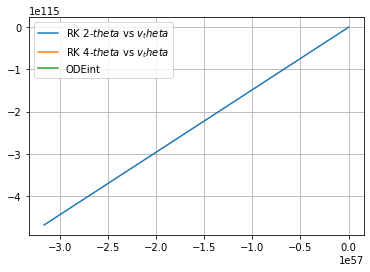

In [102]:
#figure(dpi=150)
plot(sol_RK2[:,0],sol_RK2[:,2],label="RK 2-$theta$ vs $v_theta$") #theta vs #vtheta
plot(sol_RK4[:,0],sol_RK4[:,2],label="RK 4-$theta$ vs $v_theta$") #theta vs #vtheta
plot(sol_ODEint[:,0],sol_ODEint[:,2],label="ODEint")
grid(),legend()
show()

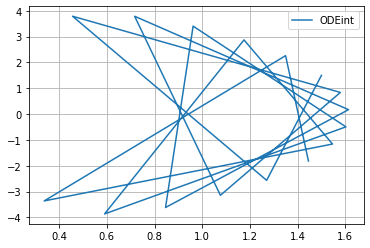

In [103]:
#figure(dpi=150)
#plot(sol_RK2[:,0],sol_RK2[:,2],label="RK 2-$theta$ vs $v_theta$") #theta vs #vtheta
#plot(sol_RK4[:,0],sol_RK4[:,2],label="RK 4-$theta$ vs $v_theta$") #theta vs #vtheta
plot(sol_ODEint[:,0],sol_ODEint[:,2],label="ODEint")
grid(),legend()
show()

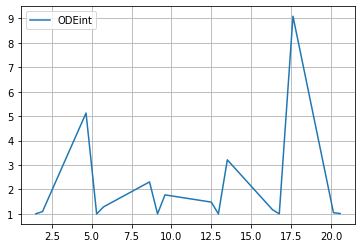

In [104]:
#figure(dpi=150)
#plot(sol_RK2[:,1],sol_RK2[:,3],label="RK 2-varphi vs v_varphi") #phi vs #vphi
#plot(sol_RK4[:,1],sol_RK4[:,3],label="RK 4-varphi vs v_varphi") #phi vs #vphi
#plot(sol_RK4[:,1],sol_RK4[:,3],label="RK 4") #phi vs #vphi
plot(sol_ODEint[:,1],sol_ODEint[:,3],label="ODEint")
grid(),legend()
show()

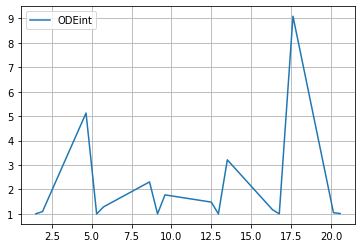

In [105]:
#figure(dpi=150)
#plot(sol_RK2[:,1],sol_RK2[:,3],label="RK 2-varphi vs v_varphi") #phi vs #vphi
#plot(sol_RK4[:,1],sol_RK4[:,3],label="RK 4-varphi vs v_varphi") #phi vs #vphi
#plot(sol_RK4[:,1],sol_RK4[:,3],label="RK 4") #phi vs #vphi
plot(sol_ODEint[:,1],sol_ODEint[:,3],label="ODEint")
grid(),legend()
show()

Gráficamos a "$\theta$ vs $tiempo$"

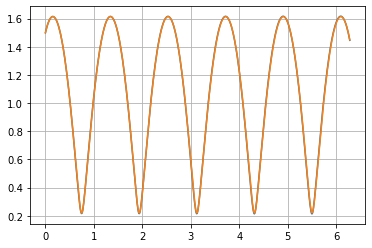

In [106]:
tiempo = arange(0,2*pi,0.01)
sol_num_rk2 = RK_2(pendulo_esferico,p_ini,tiempo)
sol_num_rk4 = RK_4(pendulo_esferico,p_ini,tiempo)
plot(tiempo,sol_num_rk2[:,0]) #tiempo vs theta
plot(tiempo,sol_num_rk4[:,0]) #tiempo vs theta
grid()
show()

Gráficamos a "$\varphi$ vs $tiempo$""

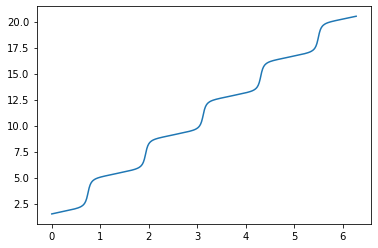

In [107]:
plot(tiempo,sol_num_rk2[:,1]) #tiempo vs phi

<ipython-input-108-71ddba505186>:3: RuntimeWarning: invalid value encountered in sin
  x=sin(sol_RK2[:,0])*cos(sol_RK2[:,1]) #x=sen(theta)cos(phi)
<ipython-input-108-71ddba505186>:4: RuntimeWarning: invalid value encountered in sin
  y=sin(sol_RK2[:,0])*sin(sol_RK2[:,1])
<ipython-input-108-71ddba505186>:5: RuntimeWarning: invalid value encountered in cos
  z=cos(sol_RK2[:,0])


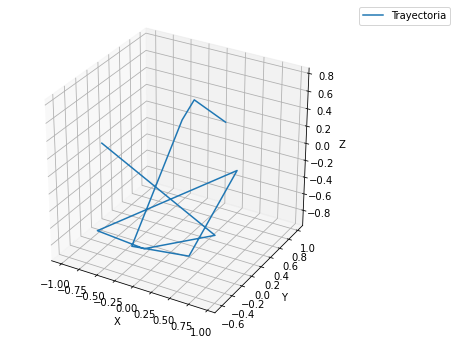

In [108]:
fig = figure(figsize=(6,6))
grafica = fig.add_subplot(111,projection='3d')
x=sin(sol_RK2[:,0])*cos(sol_RK2[:,1]) #x=sen(theta)cos(phi)
y=sin(sol_RK2[:,0])*sin(sol_RK2[:,1])
z=cos(sol_RK2[:,0])
plot(x,y,z,label='Trayectoria')
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
grafica.set_xlabel('X'),grafica.set_ylabel('Y'),grafica.set_zlabel('Z')
show()


<ipython-input-119-e44ab6074893>:3: RuntimeWarning: invalid value encountered in sin
  x=sin(sol_RK4[:,0])*cos(sol_RK4[:,1]) #x=sen(theta)cos(phi)
<ipython-input-119-e44ab6074893>:3: RuntimeWarning: invalid value encountered in cos
  x=sin(sol_RK4[:,0])*cos(sol_RK4[:,1]) #x=sen(theta)cos(phi)
<ipython-input-119-e44ab6074893>:4: RuntimeWarning: invalid value encountered in sin
  y=sin(sol_RK4[:,0])*sin(sol_RK4[:,1])
<ipython-input-119-e44ab6074893>:5: RuntimeWarning: invalid value encountered in cos
  z=cos(sol_RK4[:,0])


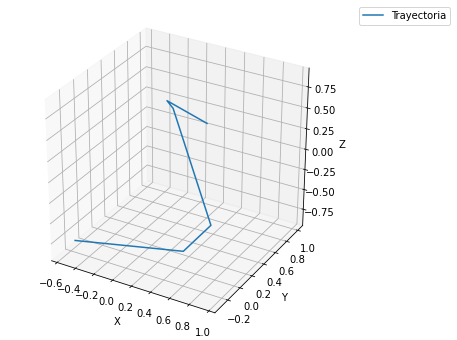

In [119]:
fig = figure(figsize=(6,6))
grafica = fig.add_subplot(111,projection='3d')
x=sin(sol_RK4[:,0])*cos(sol_RK4[:,1]) #x=sen(theta)cos(phi)
y=sin(sol_RK4[:,0])*sin(sol_RK4[:,1])
z=cos(sol_RK4[:,0])
plot(x,y,z,label='Trayectoria')
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
grafica.set_xlabel('X'),grafica.set_ylabel('Y'),grafica.set_zlabel('Z')
show()


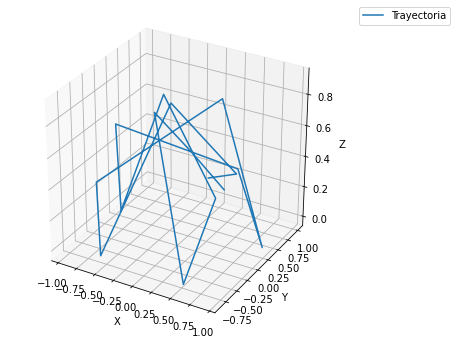

In [109]:
fig = figure(figsize=(6,6))
grafica = fig.add_subplot(111,projection='3d')
x=sin(sol_ODEint[:,0])*cos(sol_ODEint[:,1]) #x=sen(theta)cos(phi)
y=sin(sol_ODEint[:,0])*sin(sol_ODEint[:,1])
z=cos(sol_ODEint[:,0])
plot(x,y,z,label='Trayectoria')
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
grafica.set_xlabel('X'),grafica.set_ylabel('Y'),grafica.set_zlabel('Z')
show()


### <span style="color:green">Energía Potencial<span>

Como la lagrangiana $L$ no depende de $\varphi$, de la segunda ecuación de movimiento obtenemos una cantidad $h$ que se conserva.
$$sen^{2}\theta \frac{d\varphi}{dt}=h \quad.....(2.1)$$

está cantidad esta relacionada con el componente en $z$ del momento angular $L$:
$$\vec{L}=\vec{r}\times m\vec{v}$$

$$L_{z}=m\left(x\frac{dy}{dt}-y\frac{dx}{dt}\right)=ml^{2}sen^{2}\theta\frac{d\varphi}{dt}$$

Ahora recordemos que la frecuencia está dada por:
$$\omega_{0}^{2}=\frac{g}{l}$$
usando esto podemos reescribir la ecuación (1) de movimiento como:
$$\frac{d^{2}\theta}{dt^{2}}-\frac{h^{2}}{sen^{3}\theta}cos\theta+\omega_{0}^{2}sen\theta=0\quad......(1.1)$$

Derivando esto también tenemos una cantidad que se conserva:
$$
\frac{d}{dt}\left(\frac{1}{2}\left(\frac{d\theta}{dt}\right)^{2}+\frac{h^{2}}{2sen^{2}\theta}-\omega_{0}^{2}cos\theta\right)=0
$$


La conservación de la energía $\varepsilon$ se escribe como:
$$
\frac{1}{2}\left(\frac{d\theta}{dt}\right)^{2}+\frac{h^{2}}{2sen^{2}\theta}-\omega_{0}^{2}cos\theta=\varepsilon
$$


Donde $V(\theta)$ es la energía potencial efectiva
$$
V(\theta)=\frac{h^{2}}{2sen^{2}\theta}-\omega_{0}^{2}cos\theta
$$

En Julia tenemos esto
<img src="Energía potencial efectiva - copia.png" width="1700" height="1700" alt="Energía Potencial efectiva">  
<img src="Energía potencial efectiva2.png" width="500" height="500" alt="Energía Potencial efectiva">  

Recordando las ecuaciones (1.1) y (2.1)
$$
\frac{d^{2}\theta}{dt^{2}}-\frac{h^{2}}{sen^{3}\theta}cos\theta+\omega_{0}^{2}sen\theta=0$$

$$
sen^{2}\theta \frac{d\varphi}{dt}=h
$$

Si hacemos a $\varphi$ constante entonces tenemos que $\frac{d\varphi}{dt}=0$, lo que implica que $h=0$ por la segunda ecuación, entonces como $h=0$ la primer ecuación nos queda como:
$$
\frac{d^{2}\theta}{dt^{2}}+\omega_{0}^{2}sen\theta=0
$$

$$
\rightarrow \frac{d^{2}\theta}{dt^{2}}=-\omega_{0}^{2}sen\theta
$$

De esto obtenemos el siguiente sistema de ecuaciones diferenciales:
$$
\frac{d\theta}{dt}=v_{\theta}
$$

$$
\frac{dv_{\theta}}{dt}=-\omega_{0}^{2}sen\theta
$$

Ahora definimos una función donde estará el sistema de ecuaciones diferenciales.

In [132]:
def pendulo(t_vt,t,omega0 = 1):
    dth = t_vt[1]
    dv_th = -omega0*sin(t_vt[0])
    return array([dth,dv_th])

Aplicamos RK2 Y RK4

In [133]:
tiempo = arange(0,5*pi,0.05)
sol_numRK2 = RK_2(pendulo,[1,0],tiempo)
sol_numRK4 = RK_4(pendulo,[1,0],tiempo)

Gráficamos:

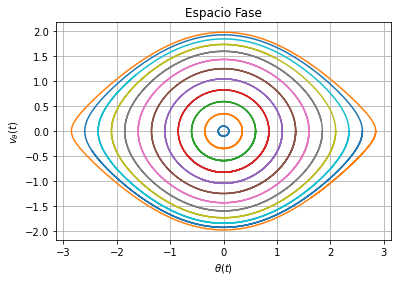

In [134]:
title("Espacio Fase-RK2"),xlabel(r"$\theta(t)$"),ylabel(r"$v_{\theta}(t)$")
tiempo = arange(0,5*pi,0.05)
th_ini_s = arange(0.1,pi-0.1,0.25)
for th_ini in th_ini_s:
    sol_num = RK_2(pendulo,[th_ini,0],tiempo)
    plot(sol_num[:,0],sol_num[:,1])
grid()
show()

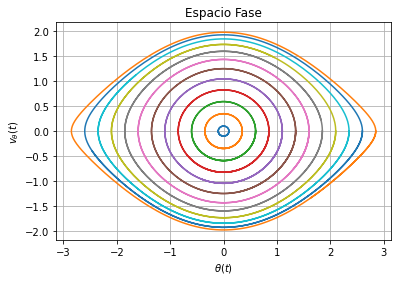

In [135]:
title("Espacio Fase-RK4"),xlabel(r"$\theta(t)$"),ylabel(r"$v_{\theta}(t)$")
tiempo = arange(0,5*pi,0.05)
th_ini_s = arange(0.1,pi-0.1,0.25)
for th_ini in th_ini_s:
    sol_num = RK_4(pendulo,[th_ini,0],tiempo)
    plot(sol_num[:,0],sol_num[:,1])
grid()
show()

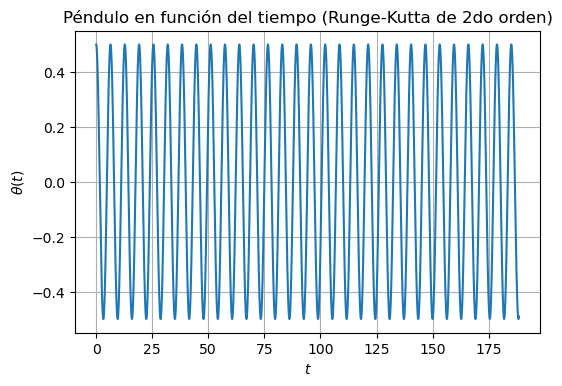

In [144]:
figure(dpi=100)
title("Péndulo en función del tiempo (Runge-Kutta de 2do orden)"),xlabel(r"$t$"),ylabel(r"$\theta(t)$")
tiempo = arange(0,60*pi,0.01)
sol_num_rk2 = RK_2(pendulo,[0.5,0.0],tiempo)
plot(tiempo,sol_num_rk2[:,0])
grid()
show()

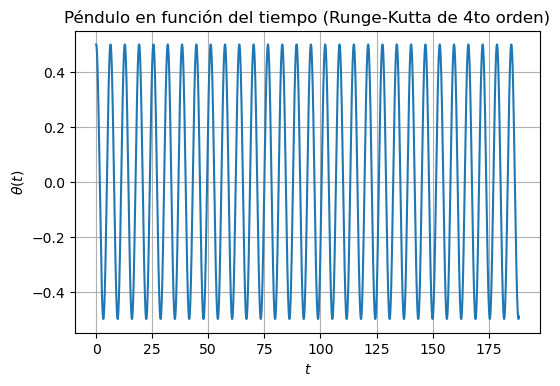

In [145]:
figure(dpi=100)
title("Péndulo en función del tiempo (Runge-Kutta de 4to orden)"),xlabel(r"$t$"),ylabel(r"$\theta(t)$")
tiempo = arange(0,60*pi,0.01)
sol_num_rk2 = RK_4(pendulo,[0.5,0.0],tiempo)
plot(tiempo,sol_num_rk2[:,0])
grid()
show()

## <span style="color:magenta">Discusión y conclusión <span>

Para analizar la función del péndulo notamos que hay dos formas de hacerlo. La primera es tomando las dos ecuaciones que resultan para la segunda derivada de los ángulos y la otra es suponer que uno de estos ángulos es constante y así nos quedamos con una ecuación. 

Para la primera definimos nuestra función de péndulo esférico, cuando graficamos cada ángulo por separado respecto al tiempo obtenemos la forma de un oscilador como se espera. Sin embargo, cuando se grafica la trayectoria notamos que hace un movimiento un poco raro por los picos de las orillas, no sabemos si es por como definimos la función o si en realidad graficamos mal.

En el análisis energético si pudimos obtener una gráfica que nos da el potencial del sistema, aquí si obtuvimos la curva que se esperaba.

En la segunda función de un péndulo simple nuevamente se hizo un análisis energético y obtuvimos una curva similar a la del péndulo esférico.

Cuando se analizó el péndulo en función del tiempo con la función Runge-Kutta de 2do orden pudimos observar que la función tiene comportamiento de oscilador armónico como se espera.

Y al hacer la comparación de diferentes integradores que la solución de Differential Equations se aleja mucho a la que se obtienen con los métodos Runge-Kutta.

En conclusión, los métodos de integración que vimos en clase nos sirvieron para poder hacer los análisis del comportamiento de los ángulos respecto al tiempo. Este mismo proyecto se intentó hacer en Julia pero algunas paqueterías eran inestables y no pudimos obtener las primeras gráficas del péndulo esférico.

Ambos lenguajes de programación son útiles para hacer este tipo de análisis pero depende de la computadora si acepta las paqueterías que se deben importar, en nuestro caso nos dio menos lata Python.


## <span style="color:magenta">Bibliografía<span>

http://www.sc.ehu.es/sbweb/fisica3/oscilaciones/portada.html

https://www.youtube.com/watch?v=_RMCZ3yNkPQ

http://physique.unice.fr/sem6/2011-2012/PagesWeb/PT/Pendule/En/study2_spherical.html